In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [ ]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df=df.iloc[:,1:]
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.columns=["gender","age","annuel_income","spending_score"]
df

,gender,age,annuel_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annuel_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.describe()

,age,annuel_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


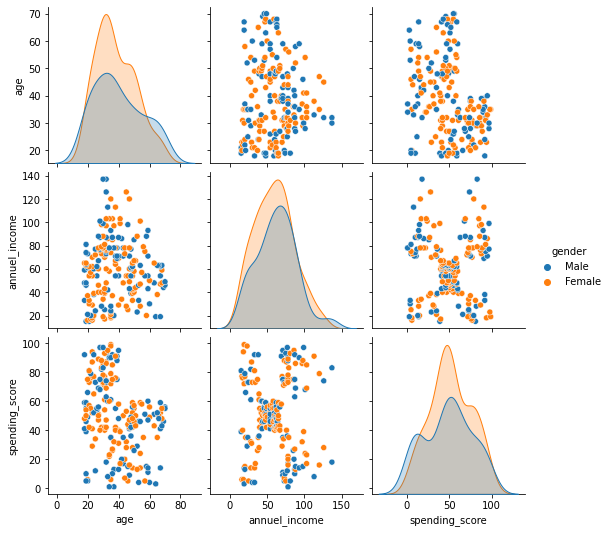

In [ ]:
sns.pairplot(df,hue="gender")

In [ ]:
[(i,df[i].nunique()) for i in df.columns]

[('gender', 2), ('age', 51), ('annuel_income', 64), ('spending_score', 84)]

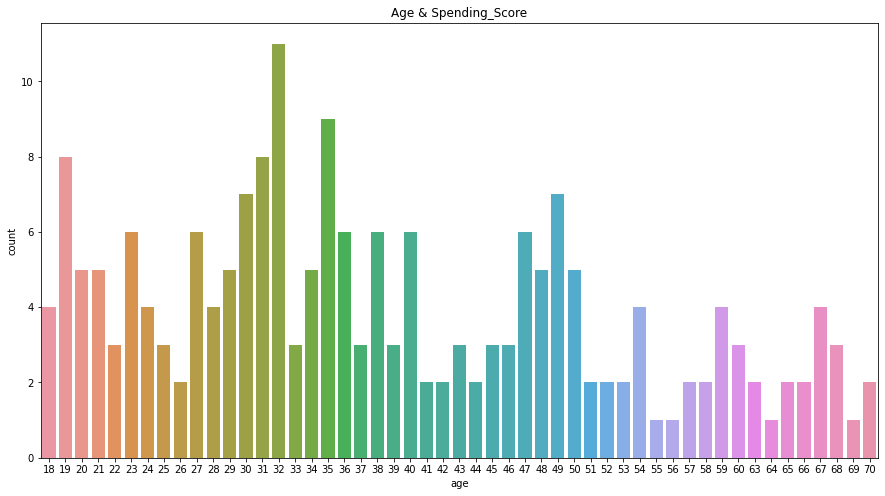

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Age & Spending_Score")
ax=sns.countplot(x="age",data=df)


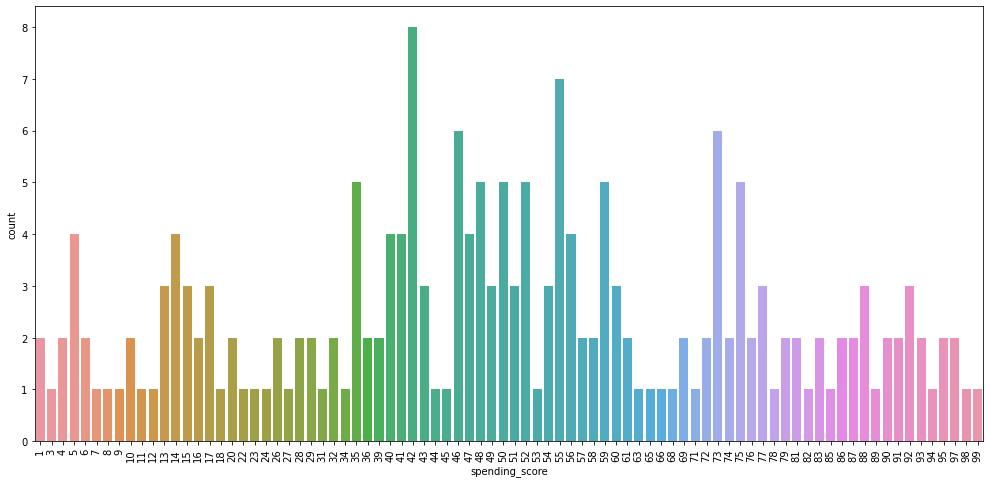

In [ ]:
plt.figure(figsize=(17,8))
sns.countplot(x="spending_score",data=df)
plt.xticks(rotation=90);

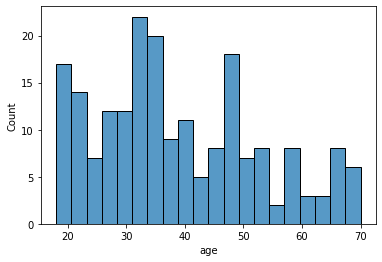

In [ ]:
sns.histplot(df.age,bins=20);


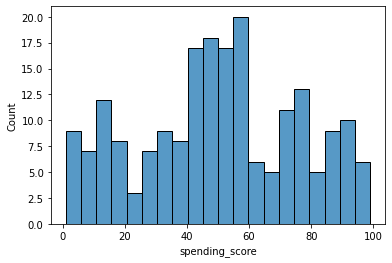

In [ ]:
sns.histplot(df.spending_score,bins=20);

In [ ]:
df.corr()

,age,annuel_income,spending_score
age,1.000000,-0.012398,-0.327227
annuel_income,-0.012398,1.000000,0.009903
spending_score,-0.327227,0.009903,1.000000


In [ ]:
df.groupby("gender")["spending_score"].mean()


gender
Female    51.526786
Male      48.511364
Name: spending_score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


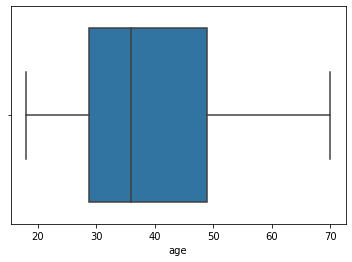

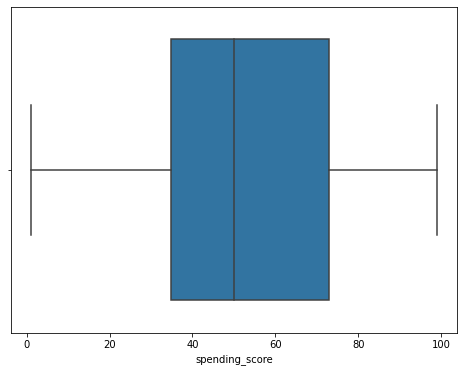

In [ ]:
sns.boxplot(df.age)
plt.figure(figsize=(8,6))
sns.boxplot(df.spending_score)

In [ ]:
pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyclustertend import hopkins

In [ ]:
hopkins(df[["age","spending_score"]],df.shape[0])

0.32466548839351267

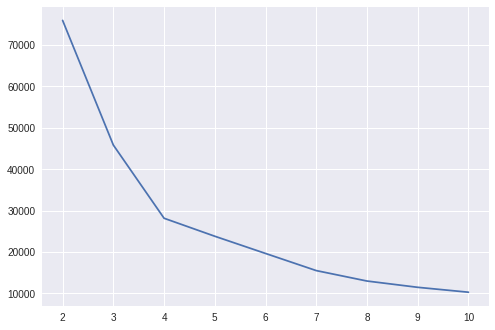

In [ ]:
from sklearn.cluster import KMeans
plt.style.use("seaborn")
scores=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=101)
  kmeans.fit(df[["age","spending_score"]].values)
  scores.append(kmeans.inertia_)
plt.plot(range(2,11),scores)  ;


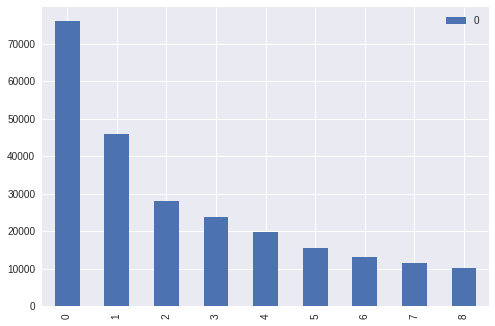

In [ ]:
pd.DataFrame(scores).plot(kind="bar")

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=101)
  kmeans.fit(df[["age","spending_score"]])
  print(i,":",silhouette_score(df[["age","spending_score"]], kmeans.labels_))

2 : 0.4692341232501655
3 : 0.45300127016521263
4 : 0.49973941540141753
5 : 0.46342248553207704
6 : 0.4235290823884998
7 : 0.4212938931368575
8 : 0.4331607448298594
9 : 0.4126012381489608
10 : 0.40231786137307357


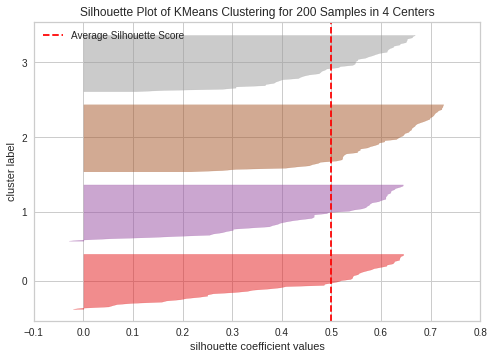

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
k_mean_model=KMeans(n_clusters=4,random_state=101)
sil_viz=SilhouetteVisualizer(k_mean_model)
sil_viz.fit(df[["age","spending_score"]])
sil_viz.show()

In [ ]:
k_mean_model.cluster_centers_

array([[27.61702128, 49.14893617],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667]])

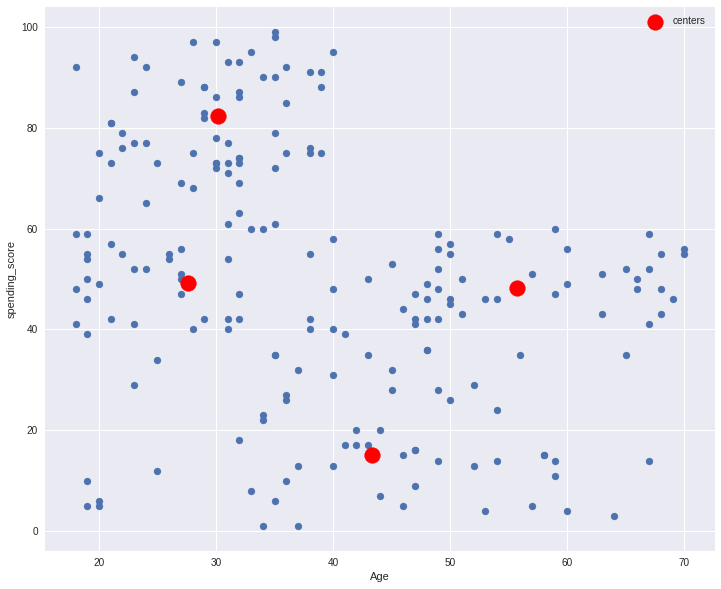

In [ ]:
plt.figure(figsize=(12,10))
plt.style.use("seaborn")
plt.scatter(df.age,df.spending_score)
plt.scatter(k_mean_model.cluster_centers_[:,0],k_mean_model.cluster_centers_[:,1],color="red",s=250,label="centers")
plt.xlabel("Age")
plt.ylabel("spending_score")
plt.legend();

In [ ]:
NotImplemented

NotImplemented